In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

warnings.filterwarnings('ignore')

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pickle
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Data Cleaning

In [2]:
dataframe = pd.read_excel('wqa.xlsx')

In [3]:
dataframe

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (‘mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1896,NAN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,6.6,7.81,603.2,2.675,0.263,40,191,2005
1897,NAN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,28,6.6,7.49,571.5,2.091,0.256,151,273,2005
1898,NAN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,5.4,7.16,75.8,2.092,NAN,404,513,2005
1899,NAN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,30,5.4,7.37,104.8,1.802,0.215,456,557,2005


In [4]:
dataframe['Temp'] = pd.to_numeric(dataframe['Temp'],errors='coerce')
dataframe['D.O. (mg/l)'] = pd.to_numeric(dataframe['D.O. (mg/l)'],errors='coerce')
dataframe['PH'] = pd.to_numeric(dataframe['PH'],errors='coerce')
dataframe['CONDUCTIVITY (‘mhos/cm)'] = pd.to_numeric(dataframe['CONDUCTIVITY (‘mhos/cm)'],errors='coerce')
dataframe['B.O.D. (mg/l)'] = pd.to_numeric(dataframe['B.O.D. (mg/l)'],errors='coerce')
dataframe['NITRATENAN N+ NITRITENANN (mg/l)'] = pd.to_numeric(dataframe['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
dataframe['FECAL COLIFORM (MPN/100ml)'] = pd.to_numeric(dataframe['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
dataframe['TOTAL COLIFORM (MPN/100ml)Mean'] = pd.to_numeric(dataframe['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [5]:
dataframe.mean()

Temp                                    26.195054
D.O. (mg/l)                              6.354072
PH                                       7.227987
CONDUCTIVITY (‘mhos/cm)               1870.865440
B.O.D. (mg/l)                            6.855576
NITRATENAN N+ NITRITENANN (mg/l)         1.657830
FECAL COLIFORM (MPN/100ml)          374606.204658
TOTAL COLIFORM (MPN/100ml)Mean      560123.277244
year                                  2010.370331
dtype: float64

In [6]:
dataframe.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 89
D.O. (mg/l)                          30
PH                                    7
CONDUCTIVITY (‘mhos/cm)              24
B.O.D. (mg/l)                        42
NITRATENAN N+ NITRITENANN (mg/l)    189
FECAL COLIFORM (MPN/100ml)          280
TOTAL COLIFORM (MPN/100ml)Mean      130
year                                  0
dtype: int64

In [7]:
dataframe.fillna(dataframe.mean(), inplace= True)

In [8]:
dataframe.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (‘mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1.901000e+03,1.901000e+03,1901.000000
mean,26.195054,6.354072,7.227987,1870.865440,6.855576,1.657830,3.746062e+05,5.601233e+05,2010.370331
std,3.294084,1.333209,0.648848,5632.668957,27.374526,3.937341,8.226762e+06,1.407559e+07,2.710534
min,10.000000,0.000000,0.000000,11.000000,0.100000,0.000000,0.000000e+00,0.000000e+00,2005.000000
25%,25.000000,5.900000,6.900000,88.000000,1.200000,0.270000,4.900000e+01,1.150000e+02,2008.000000
50%,27.000000,6.600000,7.300000,202.000000,1.900000,0.620000,3.250000e+02,5.410000e+02,2011.000000
75%,28.300000,7.100000,7.600000,666.000000,3.900000,1.657830,4.250000e+03,2.978000e+03,2013.000000
max,35.000000,11.400000,9.010000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000


In [19]:
dataframe.drop(['STATION CODE','LOCATIONS','STATE'], axis= 1 , inplace = True)

In [20]:
dataframe

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (‘mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,30.600000,6.7,7.50,203.0,6.855576,0.10000,11.0,27.0,2014
1,29.800000,5.7,7.20,189.0,2.000000,0.20000,4953.0,8391.0,2014
2,29.500000,6.3,6.90,179.0,1.700000,0.10000,3243.0,5330.0,2014
3,29.700000,5.8,6.90,64.0,3.800000,0.50000,5382.0,8443.0,2014
4,29.500000,5.8,7.30,83.0,1.900000,0.40000,3428.0,5500.0,2014
...,...,...,...,...,...,...,...,...,...
1896,26.195054,6.6,7.81,603.2,2.675000,0.26300,40.0,191.0,2005
1897,28.000000,6.6,7.49,571.5,2.091000,0.25600,151.0,273.0,2005
1898,28.000000,5.4,7.16,75.8,2.092000,1.65783,404.0,513.0,2005
1899,30.000000,5.4,7.37,104.8,1.802000,0.21500,456.0,557.0,2005


# Exploratory Data Analysis 

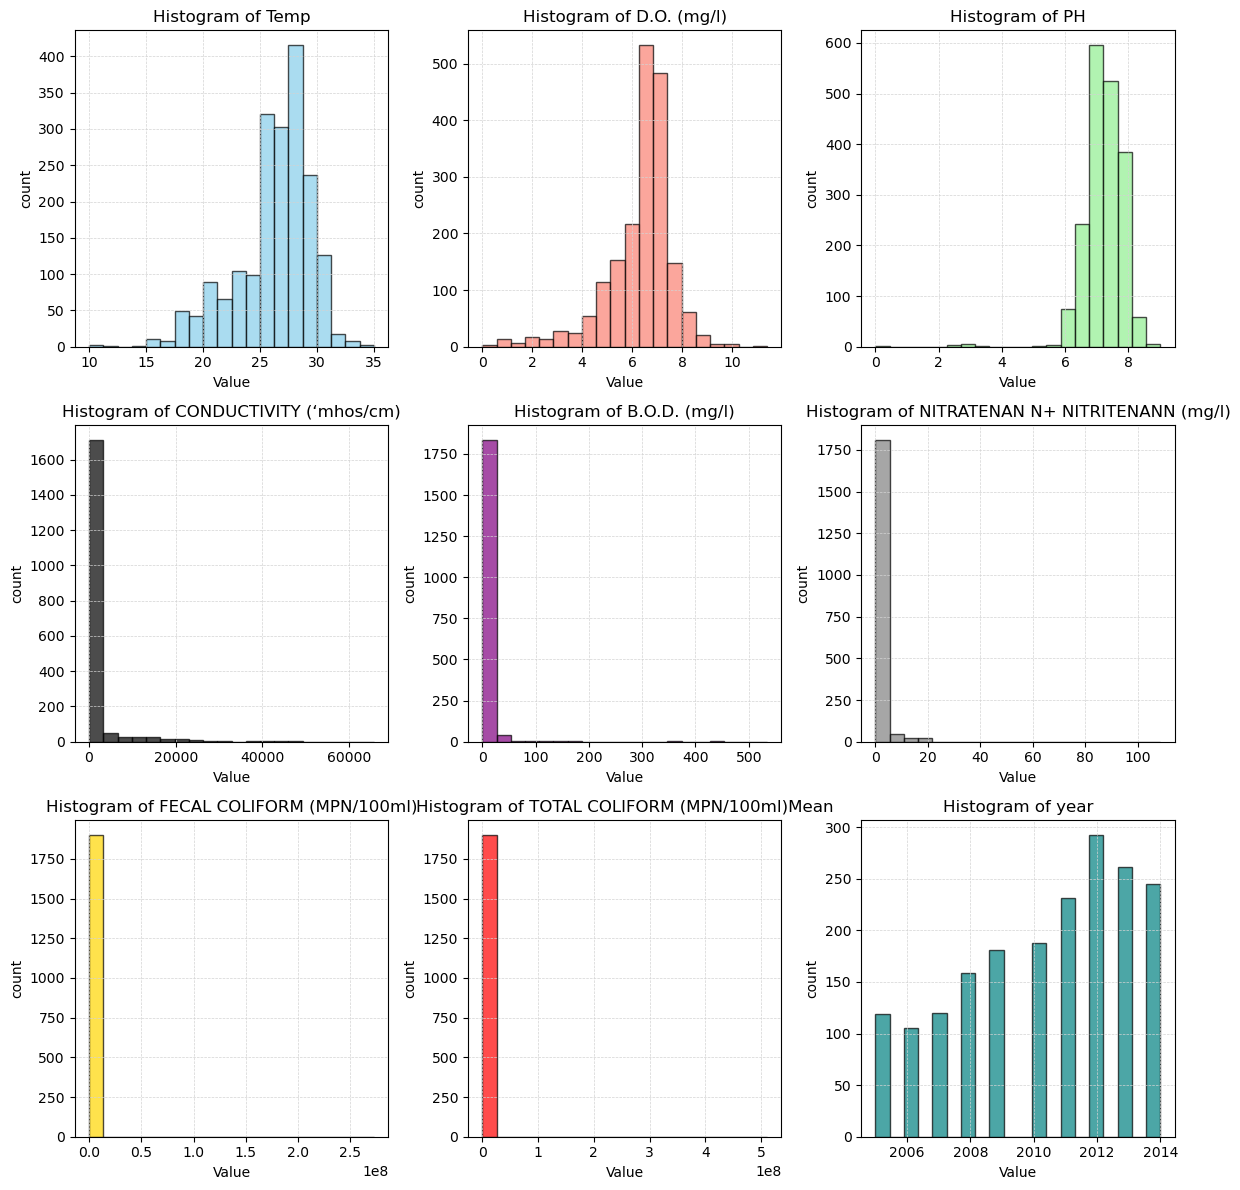

In [36]:
num_bins = 20
hist_colors = ['skyblue', 'salmon', 'lightgreen', 'black', 'purple', 'gray', 'gold', 'red', 'teal']
grid_color = 'lightgray'

# Creating separate histograms for each column
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed
for i, column in enumerate(dataframe.columns):
    plt.subplot(3, 3, i+1)  # 3x3 grid of subplots, i+1 specifies the current subplot
    plt.hist(dataframe[column], bins=num_bins, color=hist_colors[i], edgecolor='black', alpha=0.7)
    
    # Customizing the plot for each subplot
    plt.xlabel('Value')
    plt.ylabel('count')
    plt.title('Histogram of ' + column)
    plt.grid(color=grid_color, linestyle='--', linewidth=0.5)

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
dataframe

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (‘mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,30.600000,6.7,7.50,203.0,6.855576,0.10000,11.0,27.0,2014
1,29.800000,5.7,7.20,189.0,2.000000,0.20000,4953.0,8391.0,2014
2,29.500000,6.3,6.90,179.0,1.700000,0.10000,3243.0,5330.0,2014
3,29.700000,5.8,6.90,64.0,3.800000,0.50000,5382.0,8443.0,2014
4,29.500000,5.8,7.30,83.0,1.900000,0.40000,3428.0,5500.0,2014
...,...,...,...,...,...,...,...,...,...
1896,26.195054,6.6,7.81,603.2,2.675000,0.26300,40.0,191.0,2005
1897,28.000000,6.6,7.49,571.5,2.091000,0.25600,151.0,273.0,2005
1898,28.000000,5.4,7.16,75.8,2.092000,1.65783,404.0,513.0,2005
1899,30.000000,5.4,7.37,104.8,1.802000,0.21500,456.0,557.0,2005


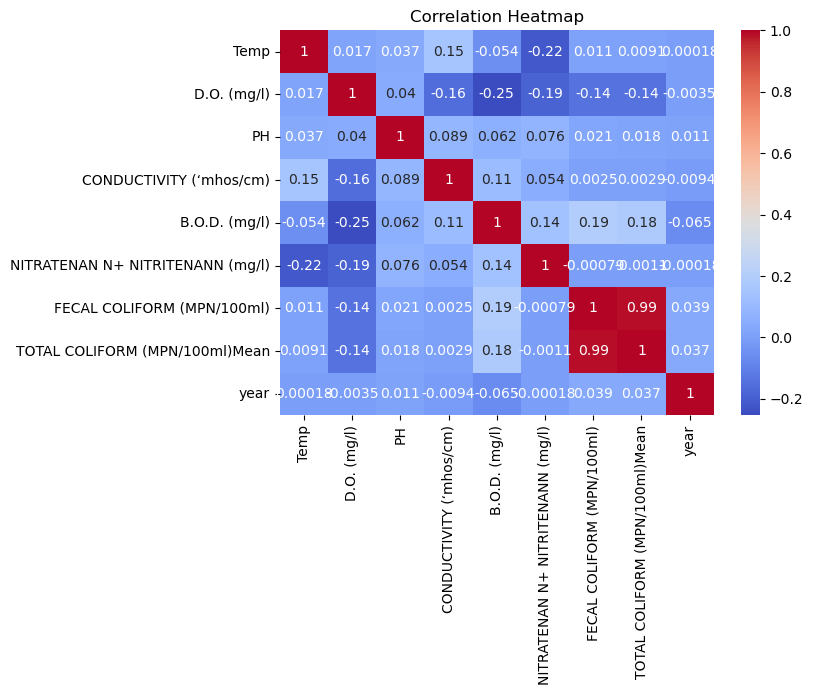

In [34]:
plt.figure(figsize=(7, 5))
sns.heatmap(dataframe.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show() 

In [37]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp                              1901 non-null   float64
 1   D.O. (mg/l)                       1901 non-null   float64
 2   PH                                1901 non-null   float64
 3   CONDUCTIVITY (‘mhos/cm)           1901 non-null   float64
 4   B.O.D. (mg/l)                     1901 non-null   float64
 5   NITRATENAN N+ NITRITENANN (mg/l)  1901 non-null   float64
 6   FECAL COLIFORM (MPN/100ml)        1901 non-null   float64
 7   TOTAL COLIFORM (MPN/100ml)Mean    1901 non-null   float64
 8   year                              1901 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 133.8 KB


In [38]:
dataframe.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (‘mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1901.000000,1.901000e+03,1.901000e+03,1901.000000
mean,26.195054,6.354072,7.227987,1870.865440,6.855576,1.657830,3.746062e+05,5.601233e+05,2010.370331
std,3.294084,1.333209,0.648848,5632.668957,27.374526,3.937341,8.226762e+06,1.407559e+07,2.710534
min,10.000000,0.000000,0.000000,11.000000,0.100000,0.000000,0.000000e+00,0.000000e+00,2005.000000
25%,25.000000,5.900000,6.900000,88.000000,1.200000,0.270000,4.900000e+01,1.150000e+02,2008.000000
50%,27.000000,6.600000,7.300000,202.000000,1.900000,0.620000,3.250000e+02,5.410000e+02,2011.000000
75%,28.300000,7.100000,7.600000,666.000000,3.900000,1.657830,4.250000e+03,2.978000e+03,2013.000000
max,35.000000,11.400000,9.010000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000


# Clustering

In [50]:
X = dataframe.values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)


cluster_labels = dbscan.fit_predict(X_scaled)


if len(set(cluster_labels)) > 2:
    cluster_labels[cluster_labels != -1] = 0
    cluster_labels[cluster_labels == -1] = 1


dataframe['Cluster'] = cluster_labels

print(dataframe['Cluster'].value_counts())

0    1115
1     786
Name: Cluster, dtype: int64


In [54]:
cluster0 = dataframe.loc[dataframe['Cluster'] == 0]

In [55]:
cluster1 = dataframe.loc[dataframe['Cluster'] == 1]

In [56]:
cluster0

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (‘mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,Cluster
0,30.600000,6.7,7.50,203.0,6.855576,0.100,11.0,27.0,2014,0
1,29.800000,5.7,7.20,189.0,2.000000,0.200,4953.0,8391.0,2014,0
2,29.500000,6.3,6.90,179.0,1.700000,0.100,3243.0,5330.0,2014,0
3,29.700000,5.8,6.90,64.0,3.800000,0.500,5382.0,8443.0,2014,0
4,29.500000,5.8,7.30,83.0,1.900000,0.400,3428.0,5500.0,2014,0
...,...,...,...,...,...,...,...,...,...,...
1893,26.195054,6.7,7.60,277.8,1.229000,0.183,12.0,33.0,2005,0
1894,28.000000,7.1,6.94,95.8,0.943000,0.151,10.0,26.0,2005,0
1895,27.000000,7.4,7.00,88.5,0.977000,0.186,27.0,105.0,2005,0
1896,26.195054,6.6,7.81,603.2,2.675000,0.263,40.0,191.0,2005,0


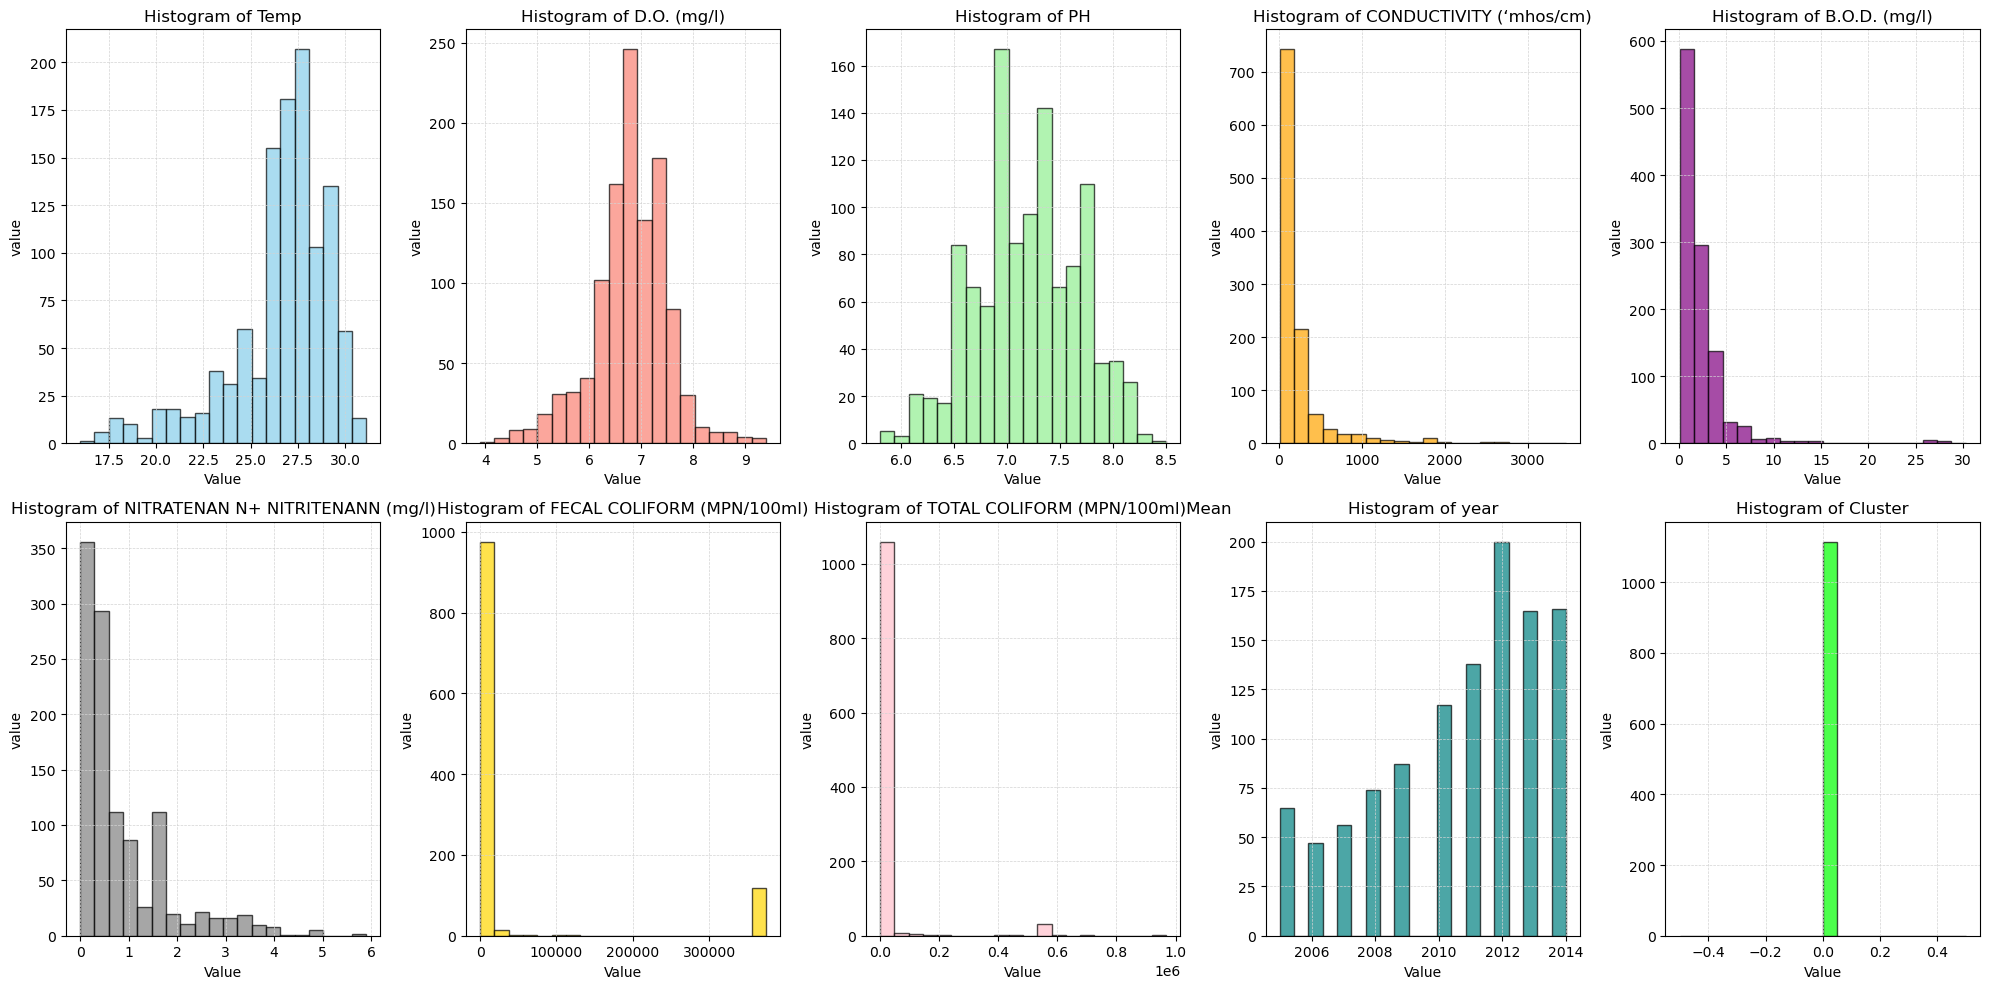

In [61]:
num_bins = 20
hist_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'gray', 'gold', 'pink', 'teal', 'lime']
grid_color = 'lightgray'

# Creating subplots for each column
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

for i, column in enumerate(cluster0.columns):
    # Customization options
bar_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'gray', 'gold', 'pink', 'teal', 'lime']
grid_color = 'lightgray'
subplot_rows = 4
subplot_cols = 10

# Create bar plot with subplots and customizations
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
for i, column in enumerate(df.columns):
    plt.subplot(subplot_rows, subplot_cols, i+1)
    plt.bar(df.index, df[column], color=bar_colors[i], edgecolor='black')
    
    # Customizing the plot for each subplot
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar Plot of ' + column)
    plt.grid(color=grid_color, linestyle='--', linewidth=0.5)

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()  # 2 rows, 5 columns grid of subplots, i+1 specifies the current subplot
    plt.hist(cluster0[column], bins=num_bins, color=hist_colors[i], edgecolor='black', alpha=0.7)
    
    # Customizing the plot for each subplot
    plt.xlabel('Value')
    plt.ylabel('value')
    plt.title('Histogram of ' + column)
    plt.grid(color=grid_color, linestyle='--', linewidth=0.5)

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

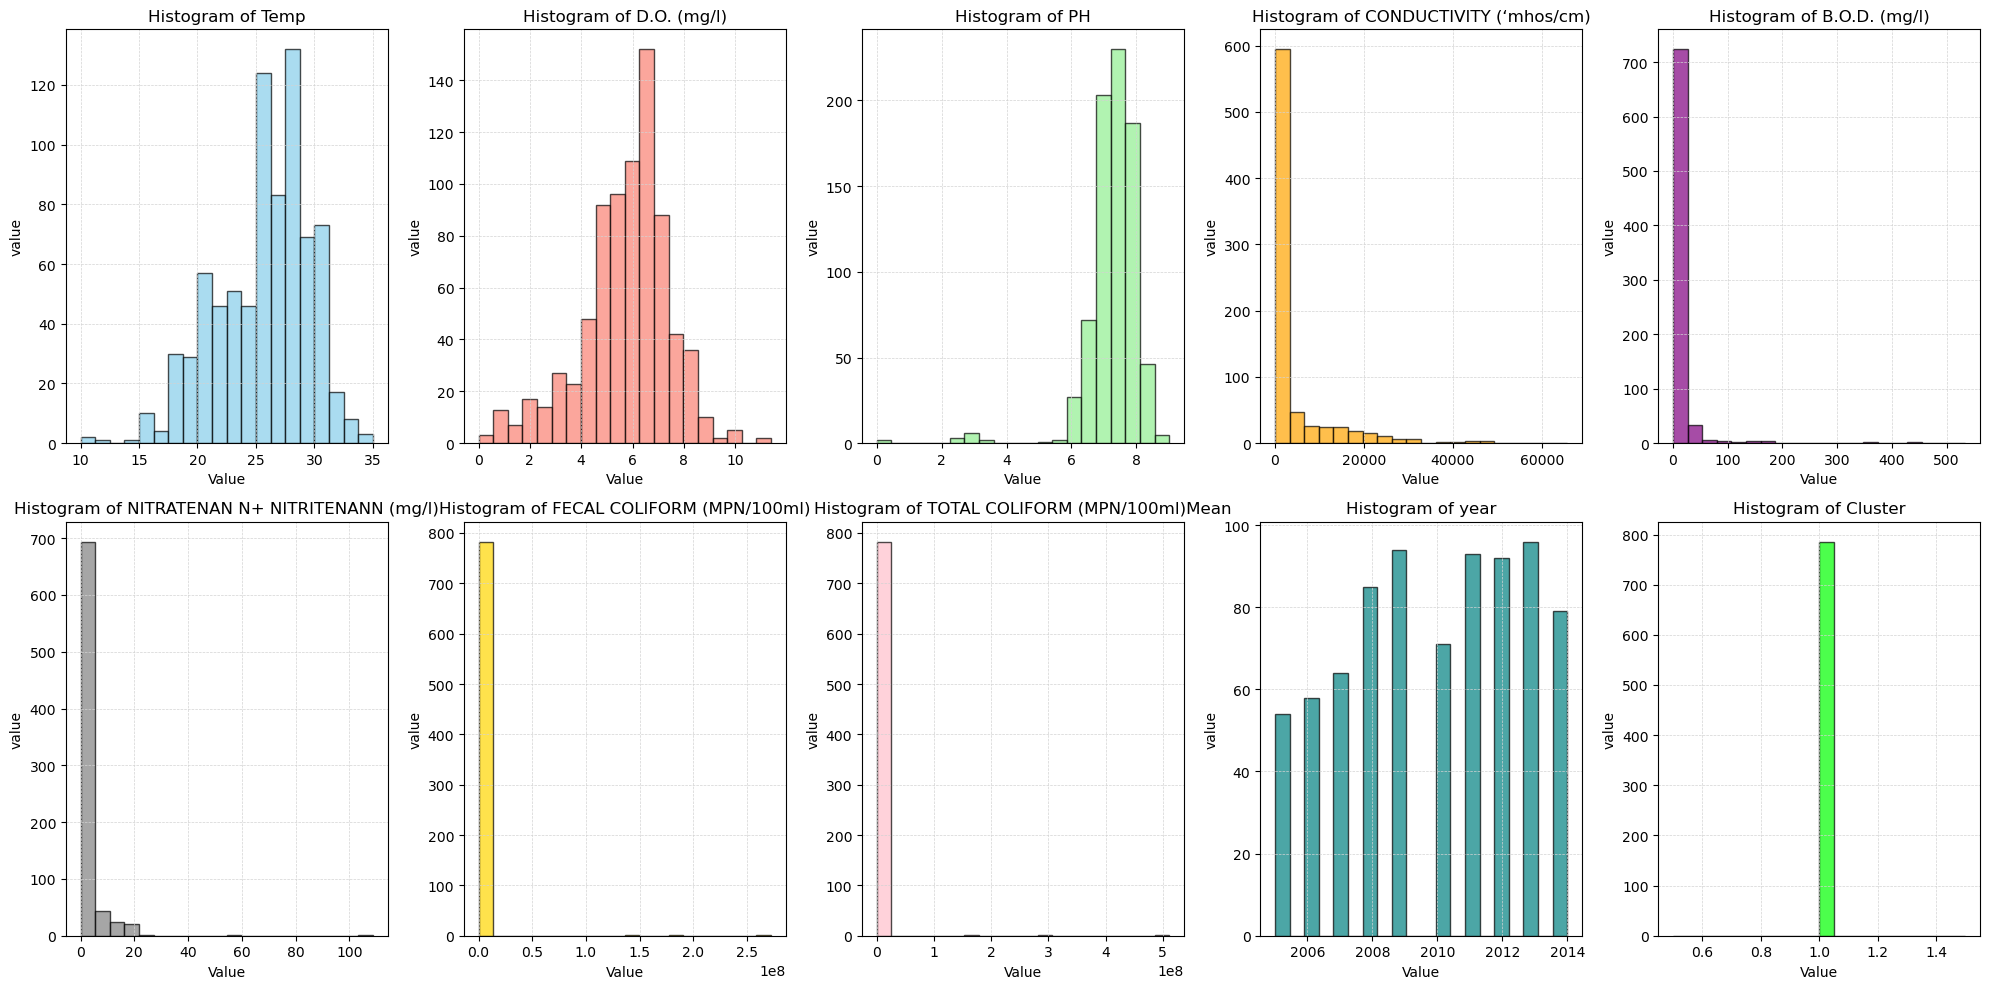

In [62]:
num_bins = 20
hist_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'gray', 'gold', 'pink', 'teal', 'lime']
grid_color = 'lightgray'

# Creating subplots for each column
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

for i, column in enumerate(cluster1.columns):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns grid of subplots, i+1 specifies the current subplot
    plt.hist(cluster1[column], bins=num_bins, color=hist_colors[i], edgecolor='black', alpha=0.7)
    
    # Customizing the plot for each subplot
    plt.xlabel('Value')
    plt.ylabel('value')
    plt.title('Histogram of ' + column)
    plt.grid(color=grid_color, linestyle='--', linewidth=0.5)

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Model Building

In [64]:
X = dataframe.drop(['Cluster'], axis =1)
y = dataframe.Cluster

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Linear Regression 

In [67]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
start_time = time.time()
LR.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time

In [68]:
evaluate(LR, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[843  47]
 [275 355]]
ACCURACY SCORE:
0.7882
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.754025    0.883085  0.788158     0.818555      0.807517
recall       0.947191    0.563492  0.788158     0.755342      0.788158
f1-score     0.839641    0.687984  0.788158     0.763813      0.776784
support    890.000000  630.000000  0.788158  1520.000000   1520.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[202  23]
 [ 73  83]]
ACCURACY SCORE:
0.7480
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.734545    0.783019  0.748031    0.758782      0.754393
recall       0.897778    0.532051  0.748031    0.714915      0.748031
f1-score     0.808000    0.633588  0.748031    0.720794      0.736587
support    225.000000  156.000000  0.748031  381.000000    381.000000


In [69]:
y_pred = LR.predict(X_test)
a = accuracy_score(y_test, y_pred) * 100
p = precision_score(y_test,y_pred,average='macro') * 100 
r = recall_score(y_test,y_pred,average='macro') * 100
f = f1_score(y_test,y_pred,average='macro') * 100

# Descision Tree

In [71]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
start_time = time.time()  
dt.fit(X_train, y_train)
end_time = time.time()  

dt_time = end_time - start_time

In [72]:
evaluate(dt, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[890   0]
 [  0 630]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    890.0  630.0       1.0     1520.0        1520.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[196  29]
 [ 28 128]]
ACCURACY SCORE:
0.8504
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.875000    0.815287  0.850394    0.845143      0.850550
recall       0.871111    0.820513  0.850394    0.845812      0.850394
f1-score     0.873051    0.817891  0.850394    0.845471      0.850466
support    225.000000  156.000000  0.850394  381.000000    381.000000


In [73]:
y_pred = dt.predict(X_test)
a1 = accuracy_score(y_test, y_pred) * 100
p1 = precision_score(y_test,y_pred,average='macro') * 100 
r1 = recall_score(y_test,y_pred,average='macro') * 100
f1 = f1_score(y_test,y_pred,average='macro') * 100

# SVM

In [74]:
from sklearn.svm import SVC
SVM = SVC()
start_time = time.time() 
SVM.fit(X_train, y_train)
end_time = time.time() 

svm_time = end_time - start_time

In [75]:
evaluate(SVM, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[890   0]
 [626   4]]
ACCURACY SCORE:
0.5882
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.587071    1.000000  0.588158     0.793536      0.758219
recall       1.000000    0.006349  0.588158     0.503175      0.588158
f1-score     0.739817    0.012618  0.588158     0.376218      0.438412
support    890.000000  630.000000  0.588158  1520.000000   1520.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[225   0]
 [156   0]]
ACCURACY SCORE:
0.5906
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.590551    0.0  0.590551    0.295276      0.348751
recall       1.000000    0.0  0.590551    0.500000      0.590551
f1-score     0.742574    0.0  0.590551    0.371287      0.438528
support    225.000000  156.0  0.590551  381.000000    381.000000


In [76]:
y_pred = dt.predict(X_test)
a2 = accuracy_score(y_test, y_pred) * 100
p2 = precision_score(y_test,y_pred,average='macro') * 100 
r2 = recall_score(y_test,y_pred,average='macro') * 100
f2 = f1_score(y_test,y_pred,average='macro') * 100

# Bagged Decision Trees (Bagging) Classifer

In [77]:
from sklearn.ensemble import BaggingClassifier
base_classifier = tree.DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier)
start_time = time.time() 
bagging_classifier.fit(X_train, y_train)
end_time = time.time() 

bg_time = end_time - start_time

In [78]:
evaluate(bagging_classifier, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[890   0]
 [  8 622]]
ACCURACY SCORE:
0.9947
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.991091    1.000000  0.994737     0.995546      0.994784
recall       1.000000    0.987302  0.994737     0.993651      0.994737
f1-score     0.995526    0.993610  0.994737     0.994568      0.994732
support    890.000000  630.000000  0.994737  1520.000000   1520.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[207  18]
 [ 32 124]]
ACCURACY SCORE:
0.8688
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.866109    0.873239  0.868766    0.869674      0.869028
recall       0.920000    0.794872  0.868766    0.857436      0.868766
f1-score     0.892241    0.832215  0.868766    0.862228      0.867664
support    225.000000  156.000000  0.868766  381.000000    381.000000


In [79]:
y_pred = bagging_classifier.predict(X_test)
a3 = accuracy_score(y_test, y_pred) * 100
p3 = precision_score(y_test,y_pred,average='macro') * 100 
r3 = recall_score(y_test,y_pred,average='macro') * 100
f3 = f1_score(y_test,y_pred,average='macro') * 100

# Adaboost classifer

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
start_time = time.time()
ada.fit(X_train, y_train)
end_time = time.time() 

ada_time = end_time - start_time

In [81]:
evaluate(ada, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[850  40]
 [ 87 543]]
ACCURACY SCORE:
0.9164
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.907150    0.931389  0.916447     0.919270      0.917197
recall       0.955056    0.861905  0.916447     0.908480      0.916447
f1-score     0.930487    0.895301  0.916447     0.912894      0.915903
support    890.000000  630.000000  0.916447  1520.000000   1520.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[209  16]
 [ 33 123]]
ACCURACY SCORE:
0.8714
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.863636    0.884892  0.871391    0.874264      0.872339
recall       0.928889    0.788462  0.871391    0.858675      0.871391
f1-score     0.895075    0.833898  0.871391    0.864487      0.870026
support    225.000000  156.000000  0.871391  381.000000    381.000000


In [82]:
y_pred = ada.predict(X_test)
a4 = accuracy_score(y_test, y_pred) * 100
p4 = precision_score(y_test,y_pred,average='macro') * 100 
r4 = recall_score(y_test,y_pred,average='macro') * 100
f4 = f1_score(y_test,y_pred,average='macro') * 100

# Vooting CLassifer

In [83]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = BaggingClassifier(base_classifier)
clf3 = tree.DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('ada', clf1), ('bg', clf2), ('dt', clf3)], voting='hard')

start_time = time.time()

eclf1.fit(X_train, y_train)
end_time = time.time() 

vt_time = end_time - start_time

In [84]:
evaluate(eclf1, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[890   0]
 [  1 629]]
ACCURACY SCORE:
0.9993
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.998878    1.000000  0.999342     0.999439      0.999343
recall       1.000000    0.998413  0.999342     0.999206      0.999342
f1-score     0.999439    0.999206  0.999342     0.999322      0.999342
support    890.000000  630.000000  0.999342  1520.000000   1520.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[212  13]
 [ 25 131]]
ACCURACY SCORE:
0.9003
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894515    0.909722  0.900262    0.902118      0.900741
recall       0.942222    0.839744  0.900262    0.890983      0.900262
f1-score     0.917749    0.873333  0.900262    0.895541      0.899563
support    225.000000  156.000000  0.900262  381.000000    381.000000


In [85]:
y_pred = eclf1.predict(X_test)
a5 = accuracy_score(y_test, y_pred) * 100
p5 = precision_score(y_test,y_pred,average='macro') * 100 
r5 = recall_score(y_test,y_pred,average='macro') * 100
f5 = f1_score(y_test,y_pred,average='macro') * 100

# KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time() 

knn_time = end_time - start_time

In [87]:
evaluate(knn, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[817  73]
 [138 492]]
ACCURACY SCORE:
0.8612
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.855497    0.870796  0.861184     0.863147      0.861838
recall       0.917978    0.780952  0.861184     0.849465      0.861184
f1-score     0.885637    0.823431  0.861184     0.854534      0.859854
support    890.000000  630.000000  0.861184  1520.000000   1520.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[185  40]
 [ 65  91]]
ACCURACY SCORE:
0.7244
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.740000    0.694656  0.724409    0.717328      0.721434
recall       0.822222    0.583333  0.724409    0.702778      0.724409
f1-score     0.778947    0.634146  0.724409    0.706547      0.719659
support    225.000000  156.000000  0.724409  381.000000    381.000000


In [88]:
y_pred = knn.predict(X_test)
a6 = accuracy_score(y_test, y_pred) * 100
p6 = precision_score(y_test,y_pred,average='macro') * 100 
r6 = recall_score(y_test,y_pred,average='macro') * 100
f6 = f1_score(y_test,y_pred,average='macro') * 100

# XGBoost

In [91]:
import xgboost as xgb
xg = xgb.XGBClassifier()
start_time = time.time()
xg.fit(X_train, y_train)
end_time = time.time() 

xg_time = end_time - start_time

In [92]:
evaluate(xg, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[890   0]
 [  0 630]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    890.0  630.0       1.0     1520.0        1520.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[215  10]
 [ 21 135]]
ACCURACY SCORE:
0.9186
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.911017    0.931034  0.918635    0.921026      0.919213
recall       0.955556    0.865385  0.918635    0.910470      0.918635
f1-score     0.932755    0.897010  0.918635    0.914882      0.918119
support    225.000000  156.000000  0.918635  381.000000    381.000000


In [93]:
y_pred = knn.predict(X_test)
a7 = accuracy_score(y_test, y_pred) * 100
p7 = precision_score(y_test,y_pred,average='macro') * 100 
r7 = recall_score(y_test,y_pred,average='macro') * 100
f7 = f1_score(y_test,y_pred,average='macro') * 100

# Gradient Boost

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
start_time = time.time()
gb.fit(X_train, y_train)
end_time = time.time() 

gb_time = end_time - start_time

In [95]:
evaluate(gb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[847  43]
 [ 81 549]]
ACCURACY SCORE:
0.9184
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.912716    0.927365  0.918421     0.920040      0.918787
recall       0.951685    0.871429  0.918421     0.911557      0.918421
f1-score     0.931793    0.898527  0.918421     0.915160      0.918005
support    890.000000  630.000000  0.918421  1520.000000   1520.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[207  18]
 [ 34 122]]
ACCURACY SCORE:
0.8635
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.858921    0.871429  0.863517    0.865175      0.864042
recall       0.920000    0.782051  0.863517    0.851026      0.863517
f1-score     0.888412    0.824324  0.863517    0.856368      0.862171
support    225.000000  156.000000  0.863517  381.000000    381.000000


In [100]:
y_pred = knn.predict(X_test)
a8 = accuracy_score(y_test, y_pred) * 100
p8 = precision_score(y_test,y_pred,average='macro') * 100 
r8 = recall_score(y_test,y_pred,average='macro') * 100
f8 = f1_score(y_test,y_pred,average='macro') * 100

# Random Forest Classifer

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time() 

rf_time = end_time - start_time

In [97]:
evaluate(rf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[890   0]
 [  0 630]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    890.0  630.0       1.0     1520.0        1520.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[209  16]
 [ 19 137]]
ACCURACY SCORE:
0.9081
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.916667    0.895425  0.908136    0.906046      0.907969
recall       0.928889    0.878205  0.908136    0.903547      0.908136
f1-score     0.922737    0.886731  0.908136    0.904734      0.907995
support    225.000000  156.000000  0.908136  381.000000    381.000000


In [98]:
y_pred = rf.predict(X_test)
a9 = accuracy_score(y_test, y_pred) * 100
p9 = precision_score(y_test,y_pred,average='macro') * 100 
r9 = recall_score(y_test,y_pred,average='macro') * 100
f9 = f1_score(y_test,y_pred,average='macro') * 100

In [101]:
results ={'Accuracy': [a,a1,a2,a3,a4,a5,a6,a7,a8,a9],
 'Recall':[r,r1,r2,r3,r4,r5,r6,r7,r8,r9],
 'Precision': [p,p1,p2,p3,p4,p5,p6,p7,p8,p9],
  'F1 Score' : [f,f1,f2,f3,f4,f5,f6,f7,f8,f9]}
index = ['Logistic Regression','Decision Tree','SVM','Bagging Classifier','Adaboost','Voting Classifier','KNN','Xgboost','Gradient Boosting','Random Forest']

In [102]:
results =pd.DataFrame(results,index=index)

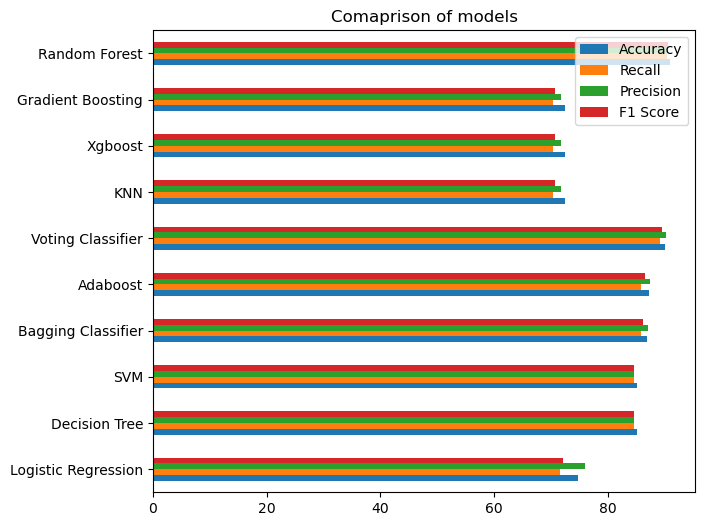

In [161]:
fig =results.plot(kind='barh',title='Comaprison of models',figsize =(7,6)).get_figure()
fig.savefig('Final Result.png')

In [118]:
results

,Accuracy,Recall,Precision,F1 Score
Logistic Regression,74.803150,71.491453,75.878216,72.079389
Decision Tree,85.039370,84.581197,84.514331,84.547130
SVM,85.039370,84.581197,84.514331,84.547130
Bagging Classifier,86.876640,85.743590,86.967411,86.222807
Adaboost,87.139108,85.867521,87.426422,86.448663
Voting Classifier,90.026247,89.098291,90.211850,89.554113
KNN,72.440945,70.277778,71.732824,70.654685
Xgboost,72.440945,70.277778,71.732824,70.654685
Gradient Boosting,72.440945,70.277778,71.732824,70.654685
Random Forest,90.813648,90.354701,90.604575,90.473435


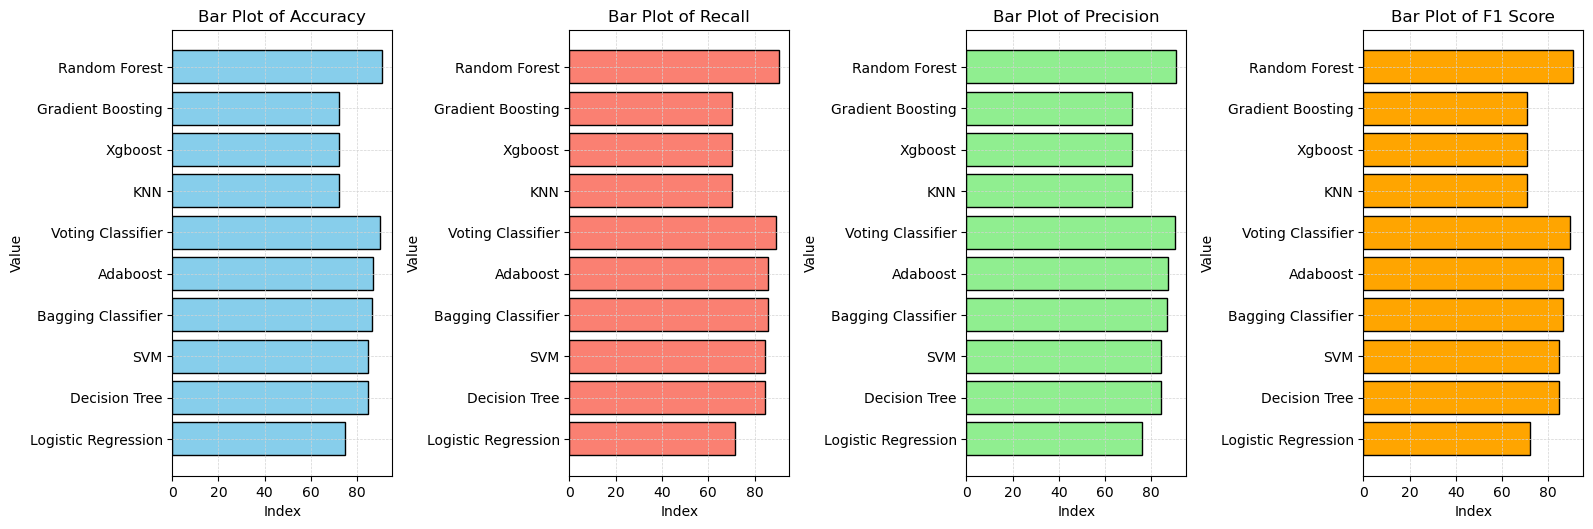

In [159]:
# Customization options
bar_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'gray', 'gold', 'pink', 'teal', 'lime']
grid_color = 'lightgray'
subplot_rows = 2
subplot_cols = 5

# Create bar plot with subplots and customizations
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
for i, column in enumerate(results.columns):
    plt.subplot(subplot_rows, subplot_cols, i+1)
    plt.barh(results.index, results[column], color=bar_colors[i], edgecolor='black')
    
    # Customizing the plot for each subplot
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar Plot of ' + column)
    plt.grid(color=grid_color, linestyle='--', linewidth=0.5)

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

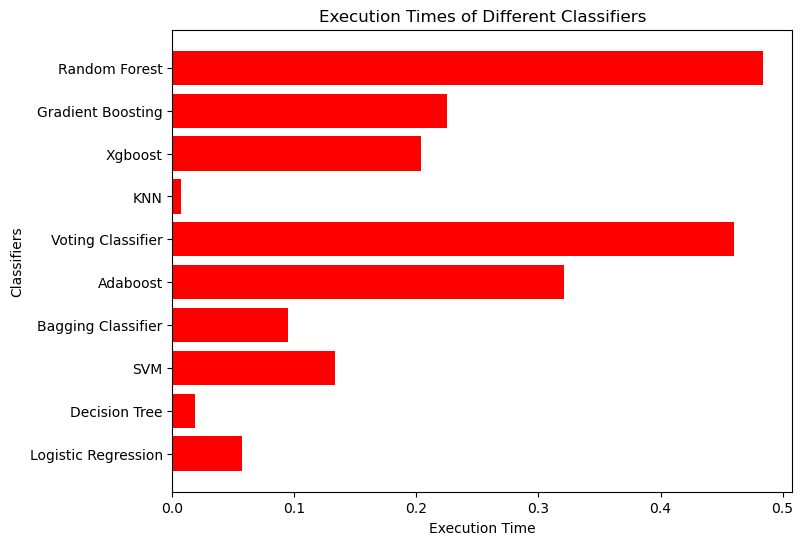

In [110]:
classifiers = ['Logistic Regression','Decision Tree','SVM','Bagging Classifier','Adaboost','Voting Classifier','KNN','Xgboost','Gradient Boosting','Random Forest']
execution_times = [lr_time, dt_time, svm_time, bg_time, ada_time, vt_time,knn_time,xg_time,gb_time,rf_time]
plt.figure(figsize=(8, 6))
plt.barh(classifiers, execution_times, color='red')
plt.xlabel('Execution Time')
plt.ylabel('Classifiers')
plt.title('Execution Times of Different Classifiers')
plt.show()

In [162]:
pickle.dump(rf,open('model.sav','wb'))